In [301]:
import pandas as pd

In [302]:
dataset= pd.read_csv("Threats.csv")

dataset

,Unnamed: 0,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,40000,40001,0.012996,tcp,-,FIN,16,18,1540,1644,...,1,6,0,0,0,5,7,0,Normal,0
1,40001,40002,0.004119,tcp,-,FIN,12,12,1064,2260,...,1,1,0,0,0,3,8,0,Normal,0
2,40002,40003,0.000988,udp,dns,CON,2,2,146,178,...,1,2,0,0,0,7,2,0,Normal,0
3,40003,40004,3.415787,tcp,ssh,FIN,230,238,24344,29556,...,1,1,0,0,0,4,1,0,Normal,0
4,40004,40005,0.193943,tcp,-,FIN,72,74,4238,63618,...,1,5,0,0,0,6,12,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135336,175336,175337,0.000009,udp,dns,INT,2,0,114,0,...,13,24,0,0,0,24,24,0,Generic,1
135337,175337,175338,0.505762,tcp,-,FIN,10,8,620,354,...,1,2,0,0,0,1,1,0,Shellcode,1
135338,175338,175339,0.000009,udp,dns,INT,2,0,114,0,...,3,13,0,0,0,3,12,0,Generic,1
135339,175339,175340,0.000009,udp,dns,INT,2,0,114,0,...,14,30,0,0,0,30,30,0,Generic,1


In [303]:
dataset.drop(['Unnamed: 0'], axis= 1, inplace= True)

dataset

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,40001,0.012996,tcp,-,FIN,16,18,1540,1644,2539.242797,...,1,6,0,0,0,5,7,0,Normal,0
1,40002,0.004119,tcp,-,FIN,12,12,1064,2260,5583.879675,...,1,1,0,0,0,3,8,0,Normal,0
2,40003,0.000988,udp,dns,CON,2,2,146,178,3036.437382,...,1,2,0,0,0,7,2,0,Normal,0
3,40004,3.415787,tcp,ssh,FIN,230,238,24344,29556,136.718127,...,1,1,0,0,0,4,1,0,Normal,0
4,40005,0.193943,tcp,-,FIN,72,74,4238,63618,747.642372,...,1,5,0,0,0,6,12,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
135337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
135338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
135339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [304]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataset['proto'] = encoder.fit_transform(dataset['proto'])
dataset['service'] = encoder.fit_transform(dataset['service'])
dataset['state'] = encoder.fit_transform(dataset['state'])
dataset['attack_cat']= encoder.fit_transform(dataset['attack_cat'])

In [305]:
from sklearn.model_selection import train_test_split

X= dataset.copy()
y= dataset['label']
X_train, X_test, y_train, y_test= train_test_split(X, y)

In [306]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()
clf= clf.fit(X_train, y_train)

In [307]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

get_params() is a method used in scikit-learn to retrieve the hyperparameters of a model (estimator) as a dictionary.

Why Use get_params()?

✅ Check model settings before training.

✅ Modify hyperparameters dynamically (useful in GridSearch or RandomizedSearch).

✅ Save model parameters for reproducibility.

In [309]:
predictions= clf.predict(X_test)

predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [310]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

In [311]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels= [0,1])

array([[ 4114,     0],
       [    0, 29722]], dtype=int64)

In [312]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

1.0

In [313]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions)

1.0

In [314]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4114
           1       1.00      1.00      1.00     29722

    accuracy                           1.00     33836
   macro avg       1.00      1.00      1.00     33836
weighted avg       1.00      1.00      1.00     33836



In [315]:
titles= list(X.columns)
classes = list(map(lambda x: dataset['id'][x], dataset['attack_cat']))

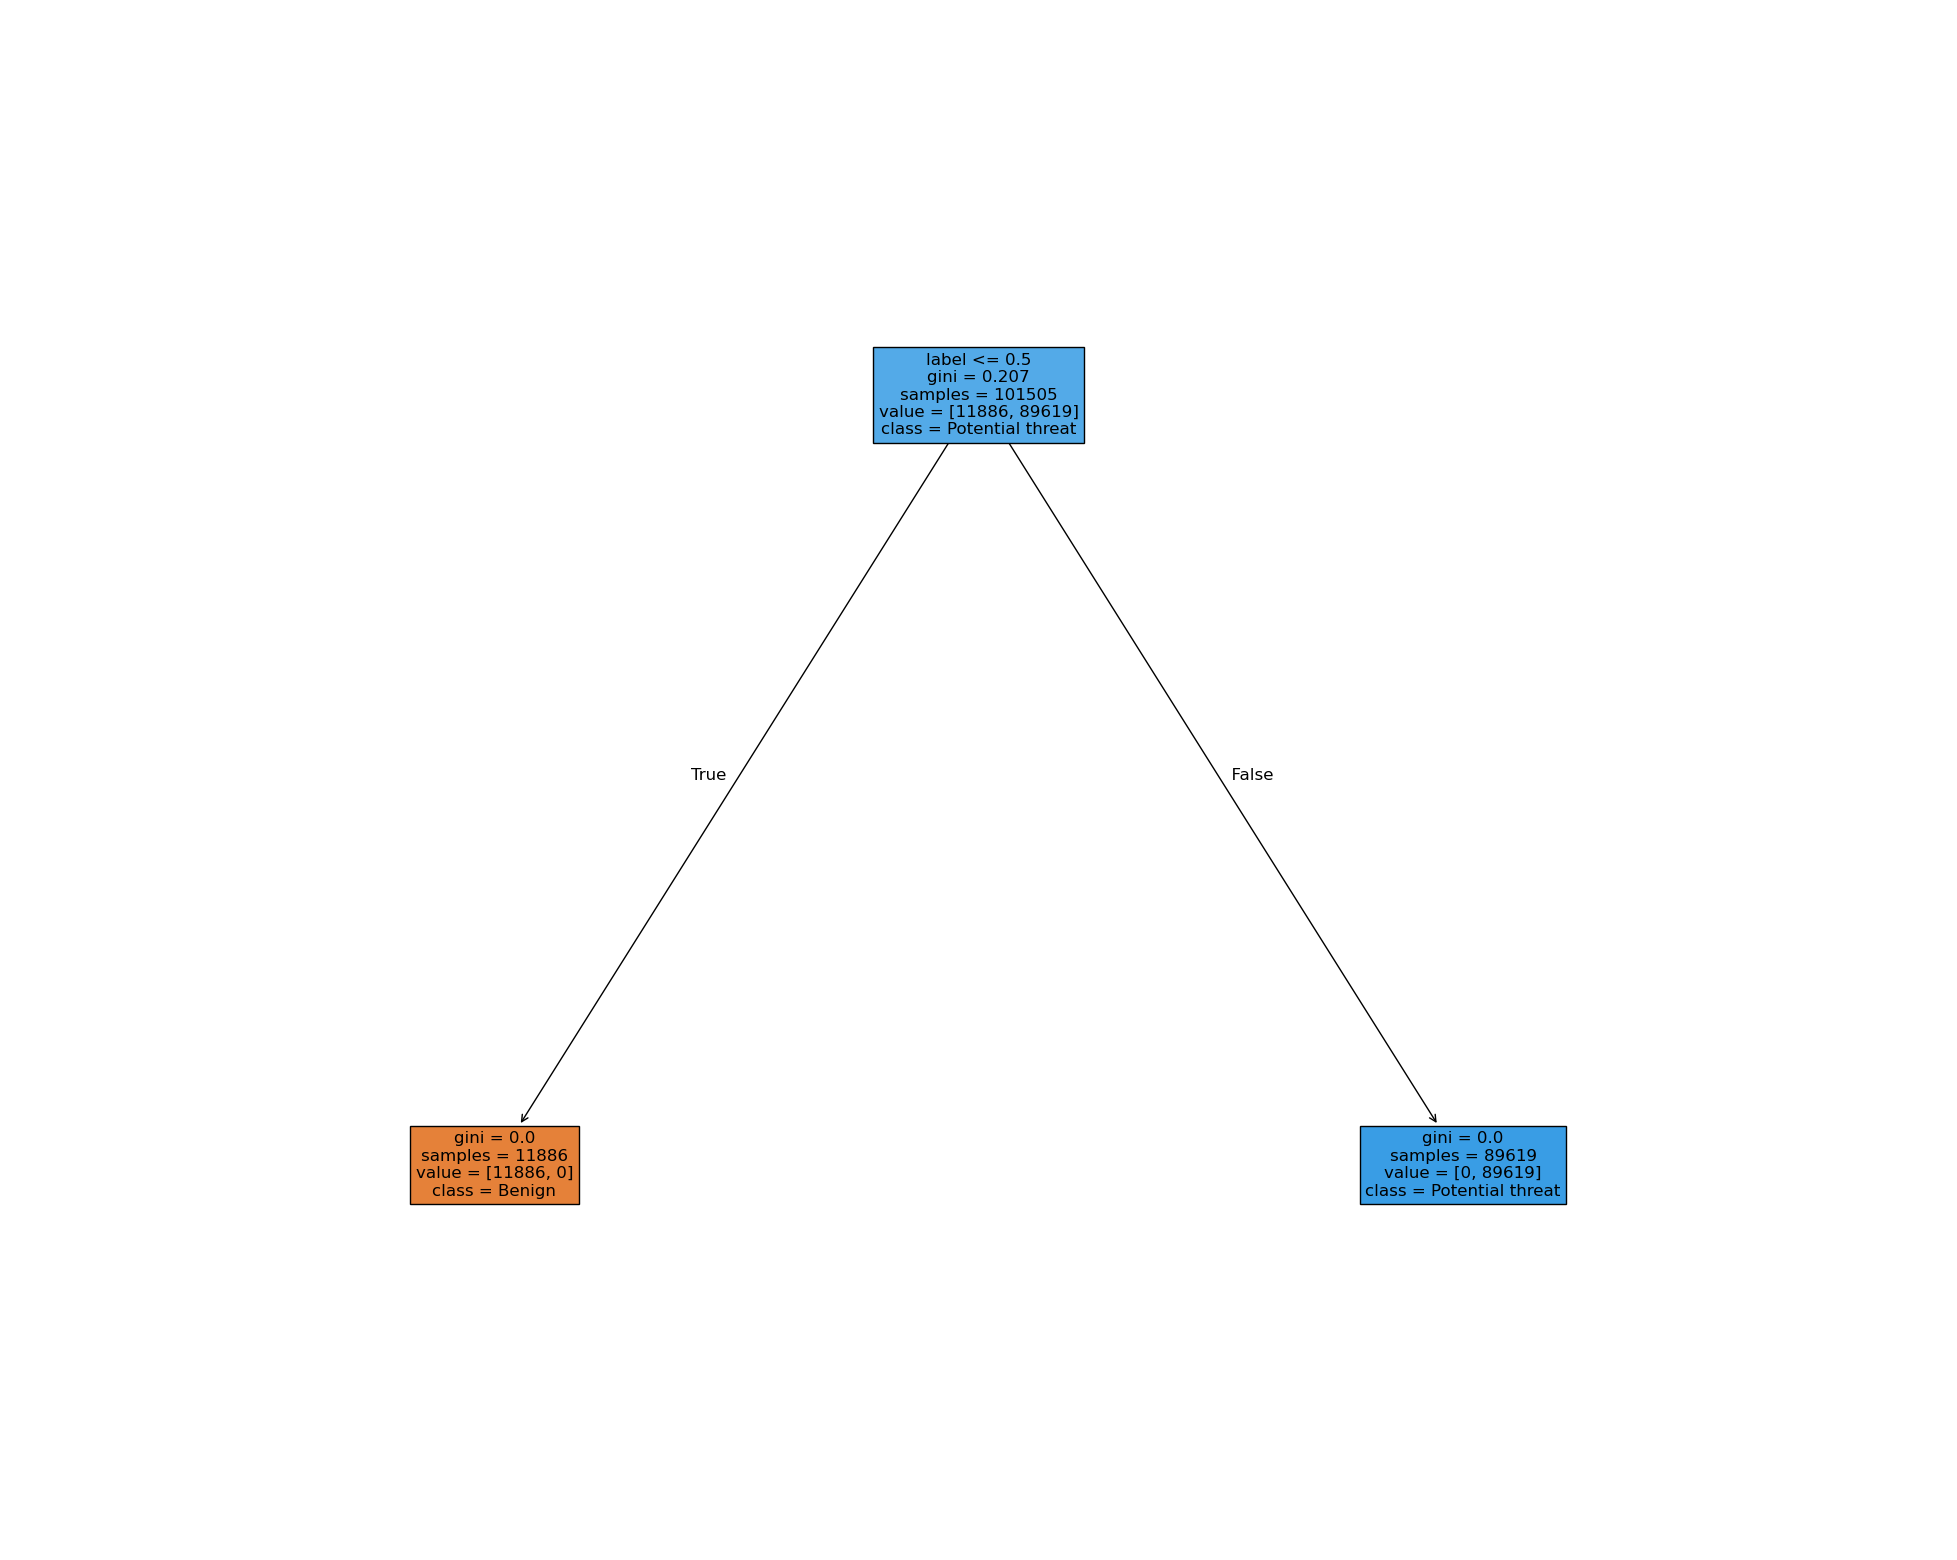

In [316]:
from sklearn import tree
from matplotlib import pyplot as plt

fig= plt.figure(figsize= (25, 20))
_= tree.plot_tree(clf, feature_names= titles, class_names= ['Benign', 'Potential threat'], filled= True, fontsize= 12)

plt.show()